# CIFAR-10: Object Classification in Images Using Deep Convolutional Neural Network (DCNN)

In this project, we used deep convolutional neural network model trained on CIFAR-10 (Canadian Institute For Advanced Research) dataset to recognize multiple objects present in various images.

## 1. Import libraries

In [0]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D 
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

## 2. Import CIFAR-10 dataset

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

In [0]:
# import cifar-10 dataset
from keras.datasets import cifar10

### 2.1. Load CIFAR-10 dataset 

In [0]:
# load cifar-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### 2.2. Examining the dataset

In [70]:
# shape of training data
print("Shape of training data: 'features'", X_train.shape)
print("Shape of training data: 'labels'", y_train.shape)
# shape of test data
print("Shape of test data: 'features'", X_test.shape)
print("Shape of test data: 'labels'", y_test.shape)

Shape of training data: 'features' (50000, 32, 32, 3)
Shape of training data: 'labels' (50000, 1)
Shape of test data: 'features' (10000, 32, 32, 3)
Shape of test data: 'labels' (10000, 1)


### 2.3. CIFAR-10 dataset classes

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

In [0]:
# cifar-10 classes
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

For each image there is a corresponding label, which is a class index.

In [72]:
print('Sample training images and their labels: ' + str([z[0] for z in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[z[0]] for z in y_train[0:10]]))

Sample training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


Here are the first 10 sample images from the training data. The images have a structure of (32,32,3) which correspond to (width, height, RGB).

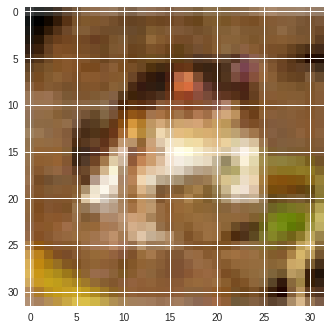

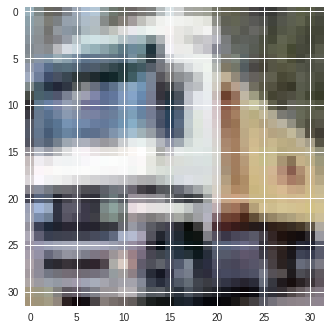

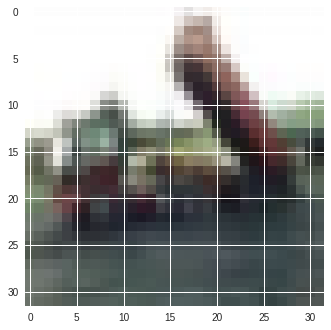

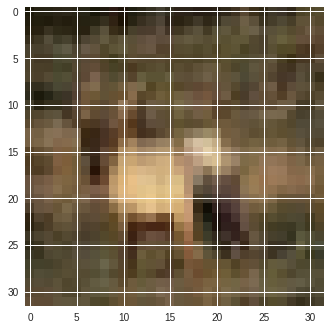

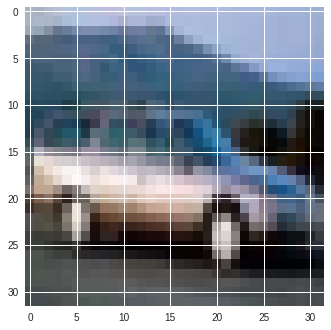

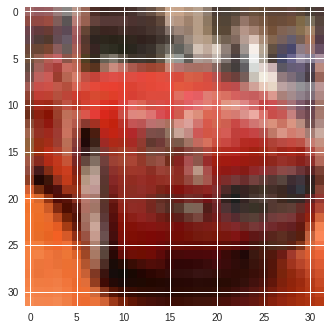

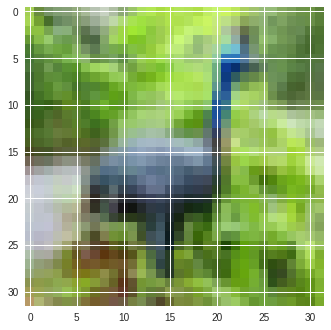

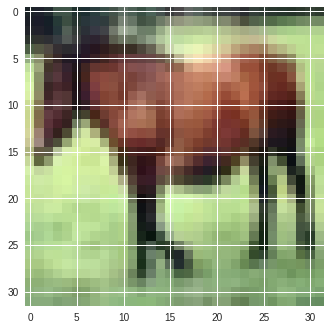

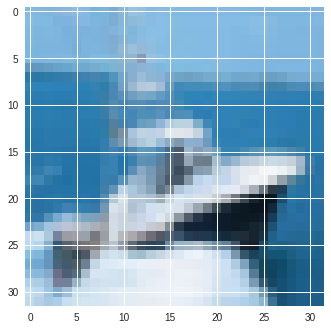

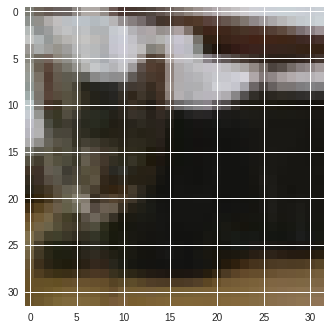

In [73]:
import matplotlib.pyplot as plt
for z in range(10):
    images = X_train[z]
    plt.imshow(images)
    plt.show()

### 2.4. Preparing the dataset

We are going to use the deep convolutional neural network to classify the images. Instead of class indices we will use one-hot encoded vectors to represent the labels of the samples.


In [0]:
cifar_num_classes = 10
# Transform label indices to one-hot encoded vectors
y_train = to_categorical(y_train, cifar_num_classes)
y_test = to_categorical(y_test, cifar_num_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### 2.5. Normalize the image data

A simple way to normalize our data is to scale the pixel values between 0 to 1 range.

In [0]:
# Normalization of pixel values between 0 to 1 range 
X_train /= 255.0
X_test /= 255.0

## 3. Training of Convolutional Neural Network (CNN) Model

Let's train our model now! We will store the training loss values and metrics in a history object, so we can visualize the training process later.

We are going to train the model for 15 epochs, using a batch size of 64 and a validation split of 0.2. The latter means that 20% of our training data will be used as validation samples.

### 3.1. Regularization 

Regularization methods are used to prevent overfitting, making these larger models generalize better.

We used "dropout" as a regularization method. Dropout works on a neural network layer by masking a random subset of its outputs (zeroing them) for every input with probability p and scaling up the rest of the outputs by 1/(1 - p).

Dropout is normally used during training. Masking prevents gradient backpropagation through the masked outputs. The method thus selects a random subset of the neural network to train on any particular example. This can be thought of as training a model ensemble to solve the task, with the individual models sharing parameters.

At test time, p is set to zero. This can be interpreted as averaging the outputs of the ensemble models. Because of the scaling, the expected layer outputs are the same during training and testing.

### 3.2. Batch Normalization

Batch Normalization works by normalizing layer outputs to a running mean and variance. This speeds up training and improves the final performance of the model. The running statistics are fixed at test time.

While batch normalization works as a regularizer, it also benefits smaller models.

### 3.3 Creating CNN model
We will use three convolutional layers, each with a kernel size of (3,3) and ReLU activation function. First convolutional layer with 32 filters, second convolutional layer with 64 filters and third convolutional layer with 128 filters.

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(80))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(cifar_num_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

The summary of this model could be seen below:

In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_17 (Batc (None, 16, 16, 64)        256       
__________

We used the Stochastic Gradient Descent algorithm (SGD) to optimize the weights on the backpropagation. Set the momentum parameter as 0.9, and just leave the others as default.

In [0]:
opt = SGD(lr=0.01, momentum=0.9, decay=0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [79]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
 - 16s - loss: 1.6995 - acc: 0.3857 - val_loss: 1.9191 - val_acc: 0.3255
Epoch 2/100
 - 15s - loss: 1.4084 - acc: 0.4903 - val_loss: 2.2321 - val_acc: 0.3132
Epoch 3/100
 - 15s - loss: 1.2869 - acc: 0.5379 - val_loss: 1.5114 - val_acc: 0.4696
Epoch 4/100
 - 15s - loss: 1.2070 - acc: 0.5704 - val_loss: 1.1904 - val_acc: 0.5665
Epoch 5/100
 - 15s - loss: 1.1426 - acc: 0.5935 - val_loss: 1.4472 - val_acc: 0.4858
Epoch 6/100
 - 15s - loss: 1.0982 - acc: 0.6101 - val_loss: 1.0916 - val_acc: 0.6122
Epoch 7/100
 - 15s - loss: 1.0574 - acc: 0.6238 - val_loss: 0.9254 - val_acc: 0.6733
Epoch 8/100
 - 15s - loss: 1.0280 - acc: 0.6354 - val_loss: 0.9065 - val_acc: 0.6785
Epoch 9/100
 - 15s - loss: 0.9912 - acc: 0.6479 - val_loss: 0.9589 - val_acc: 0.6584
Epoch 10/100
 - 15s - loss: 0.9713 - acc: 0.6571 - val_loss: 1.4766 - val_acc: 0.5131
Epoch 11/100
 - 15s - loss: 0.9519 - acc: 0.6626 - val_loss: 0.8883 - val_acc: 0.6921
Epoch 12/100


In [0]:
def plotAccuracy(history):  
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model Accuracy')
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

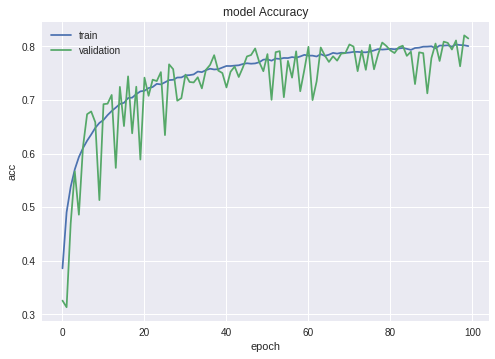

In [81]:
plotAccuracy(history)

In [0]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

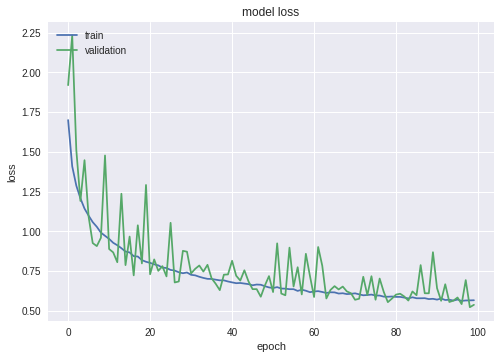

In [83]:
plotLosses(history)

### 3.4 Evaluating the CNN model

In [84]:
evaluate = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print(model.metrics_names)
print(evaluate)

['loss', 'acc']
[0.5546971242904664, 0.8089]
